In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("loan.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10. Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11. Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12. Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13. Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.


we have build a model that can predict loan will be approved or not

In [3]:
df.shape

(614, 13)

There are 614 rows and 13 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


 There are 12 independent variables(Numerical)
    
1. Loan_id
2. Gender
3. Married
4. Dependents
5. Education
6. self_Employed
7. ApplicationIncome
8. CoapplicantIncome
9. LoanAmount
10. Loan_Amount_Term
11. Credit_History
12. Property_Area
        
Target varible:
    
1. Loan_Status(catagorical).this is classification prolem    

In [5]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values presnt in some columns

1. catagorical columns null value filled with their mode
2. numerical columns null values filled with their mean

# Handling Null Values

In [6]:
# Gender
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
#Married
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
#Dependents
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
# Self_Employed
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])
# Loan_Amount
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].median())
# Loan_Amount_Term
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0])
# Credit History
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [8]:
# recheck the null values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

There is no missing values

In [9]:
# drop unwanted columns
df.drop(['Loan_ID'],axis=1,inplace=True)

In [10]:
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
#checking unique values
cat_cols = df.select_dtypes(include="O").columns

for columns in cat_cols:
    print("Unique Values of:", columns,set(df[columns]))

    print("-"*50)

Unique Values of: Gender {'Female', 'Male'}
--------------------------------------------------
Unique Values of: Married {'No', 'Yes'}
--------------------------------------------------
Unique Values of: Dependents {'1', '0', '3+', '2'}
--------------------------------------------------
Unique Values of: Education {'Graduate', 'Not Graduate'}
--------------------------------------------------
Unique Values of: Self_Employed {'No', 'Yes'}
--------------------------------------------------
Unique Values of: Property_Area {'Semiurban', 'Rural', 'Urban'}
--------------------------------------------------
Unique Values of: Loan_Status {'Y', 'N'}
--------------------------------------------------


In [12]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


# Loan Analysis

In [13]:
df.corr()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


<AxesSubplot:>

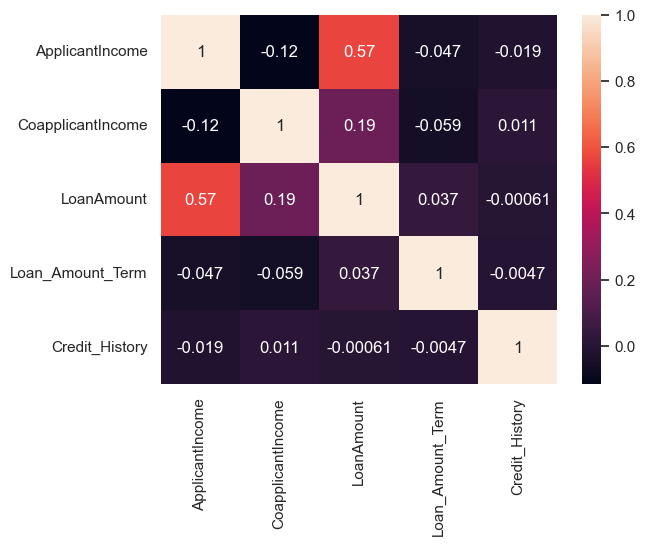

In [14]:
sns.heatmap(df.corr(),annot=True)

In [15]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='Gender', ylabel='count'>

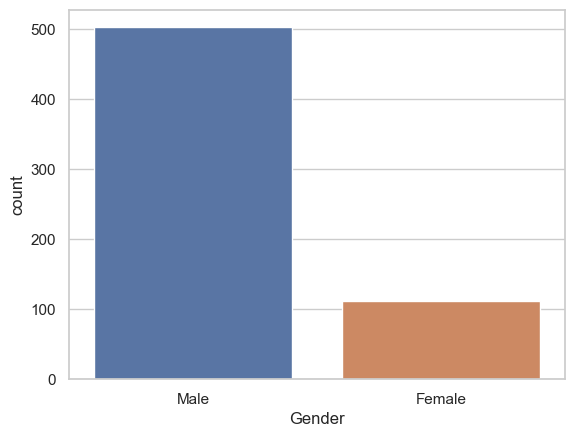

In [16]:
sns.countplot(df['Gender'])


In [17]:
df['Gender'].value_counts()

Male      502
Female    112
Name: Gender, dtype: int64

There are 502 are males and 112 are Females

most of the applicant are males

<AxesSubplot:xlabel='Married', ylabel='count'>

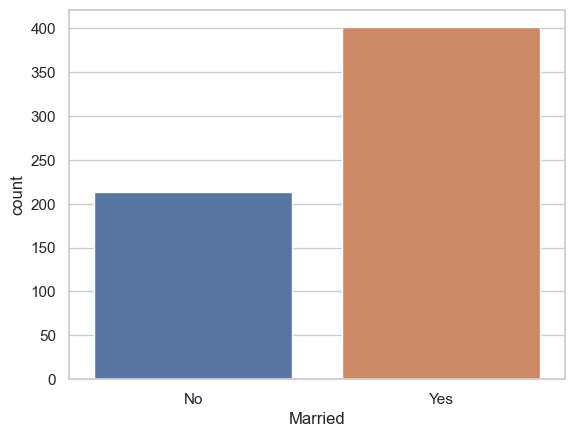

In [18]:
# Married status
sns.countplot(df['Married'])

In [19]:
df['Married'].value_counts()

Yes    401
No     213
Name: Married, dtype: int64

Most of the Applicant are Marries-->401

rest are unmarried-->213

<AxesSubplot:xlabel='Dependents', ylabel='count'>

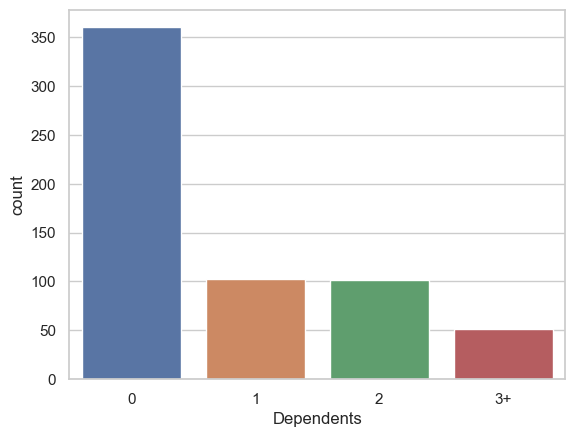

In [20]:
# applicant dependency
sns.countplot(df['Dependents'])

In [21]:
df['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

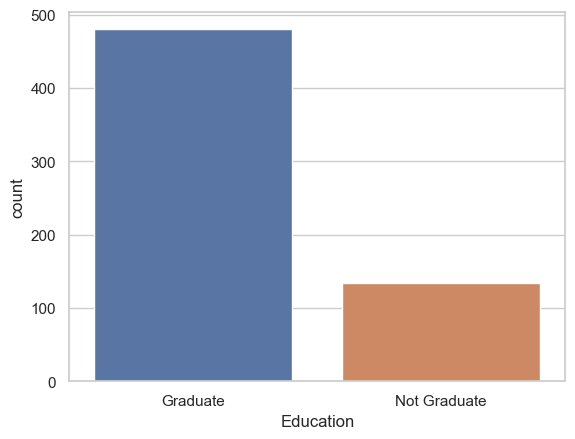

In [22]:
#Education
sns.countplot(df['Education'])

In [23]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

Graduate applicant-->480

not Graduate applicant--->134

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

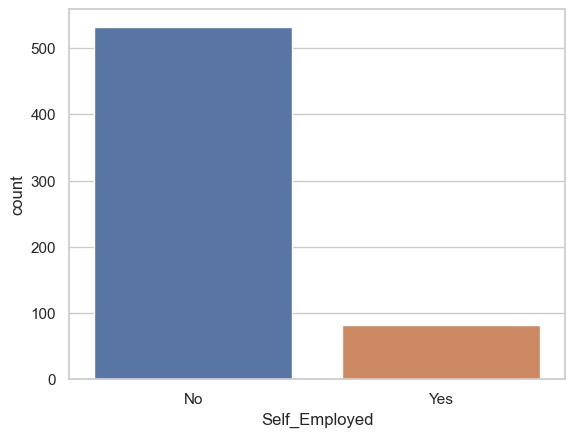

In [24]:
# self Employed
sns.countplot(df['Self_Employed'])

In [25]:
df['Self_Employed'].value_counts()

No     532
Yes     82
Name: Self_Employed, dtype: int64

Applicants who are not self Employed--->532

Applicants who are  self Employed--->82

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

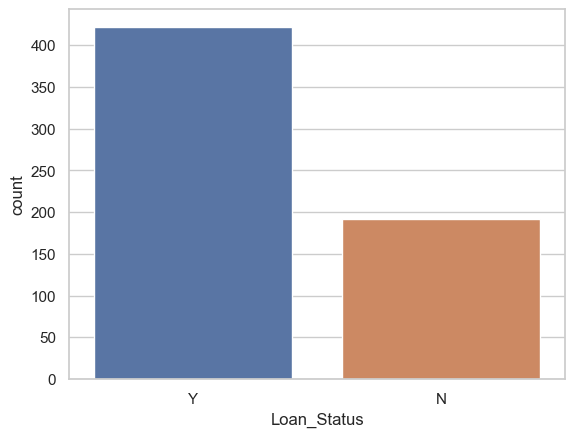

In [26]:
# Loan Status
sns.countplot(df['Loan_Status'])

In [27]:
df['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

There are 422 applicants loan approved

there are 192 applicants loan have not been approved

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

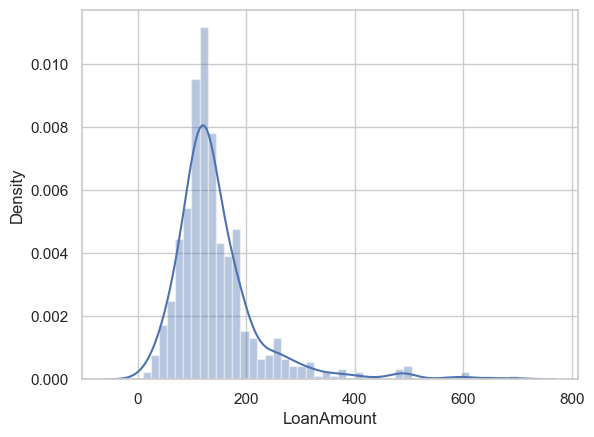

In [28]:
#Loan_Amount
sns.distplot(df['LoanAmount'])

most of the applicant will apply for loan amount between 100 to 200

# Bivariant Analysis

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

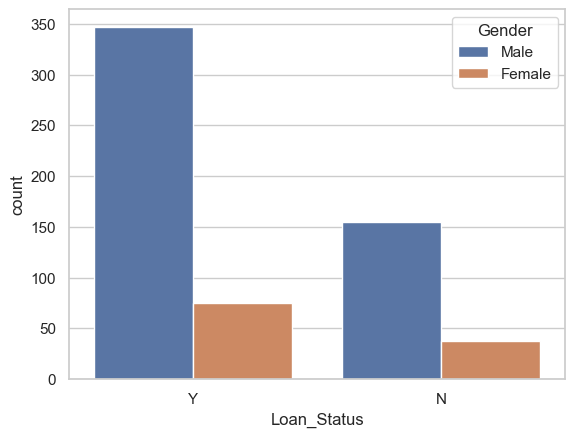

In [29]:
# Relation between Gender and Loan Status
sns.countplot(df['Loan_Status'],hue=df['Gender'])

In [30]:
pd.crosstab(df['Loan_Status'],df['Gender'])

Gender,Female,Male
Loan_Status,,
N,37,155
Y,75,347


Total Females are 112

1. 75 Females loan have approved
2. 37 Females loan have not approved

Total Males are 502

1. 347 males loan have approved
2. 155 males loan have not approved

<AxesSubplot:xlabel='Education', ylabel='count'>

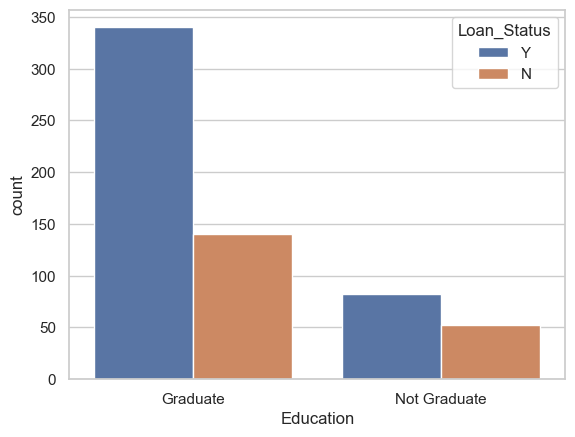

In [31]:
# Relation between Education and Loan Status
sns.countplot(df['Education'],hue=df['Loan_Status'])


<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

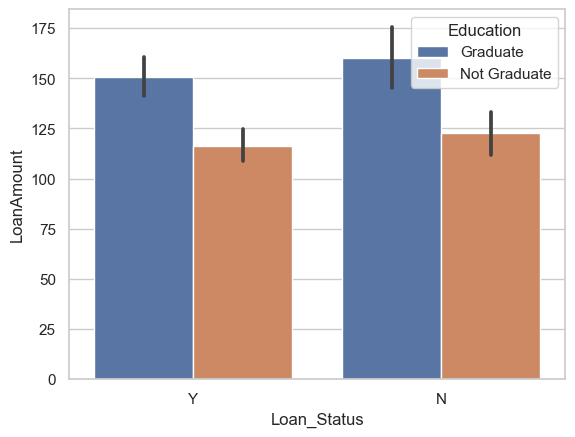

In [32]:
sns.set_theme(style="whitegrid")
sns.barplot(df['Loan_Status'],df['LoanAmount'],hue=df['Education'])

<AxesSubplot:xlabel='Loan_Status', ylabel='LoanAmount'>

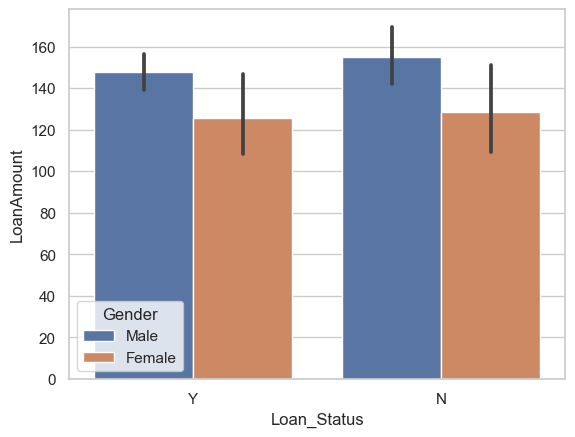

In [33]:
# Relation between loan_Status LoanAmount and Gender
sns.barplot(df['Loan_Status'],df['LoanAmount'],hue=df['Gender'])

<AxesSubplot:xlabel='Loan_Status', ylabel='Loan_Amount_Term'>

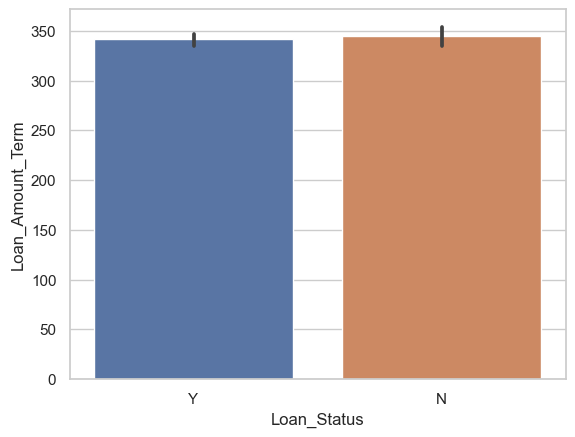

In [34]:
# Relation between Loan_Status and Loan_Aount_Term
sns.barplot(df['Loan_Status'],df['Loan_Amount_Term'])

In [35]:
pd.crosstab(df['Loan_Status'],df['Loan_Amount_Term'])

Loan_Amount_Term,12.0,36.0,60.0,84.0,120.0,180.0,240.0,300.0,360.0,480.0
Loan_Status,,,,,,,,,,
N,0,2,0,1,0,15,1,5,159,9
Y,1,0,2,3,3,29,3,8,367,6


<AxesSubplot:xlabel='Loan_Status', ylabel='ApplicantIncome'>

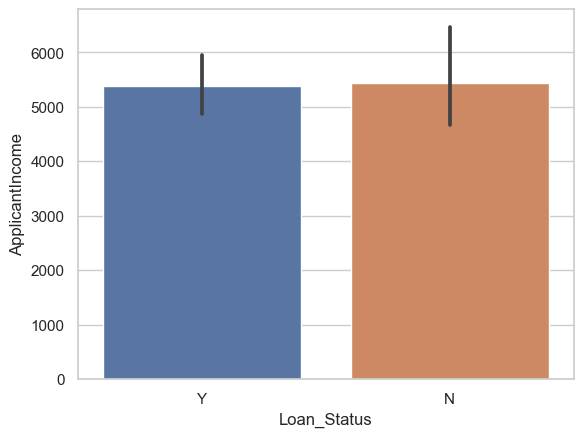

In [36]:
#Relationship between Loan_Status and ApplicantIncome
sns.barplot(df['Loan_Status'],df['ApplicantIncome'])

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Count'>

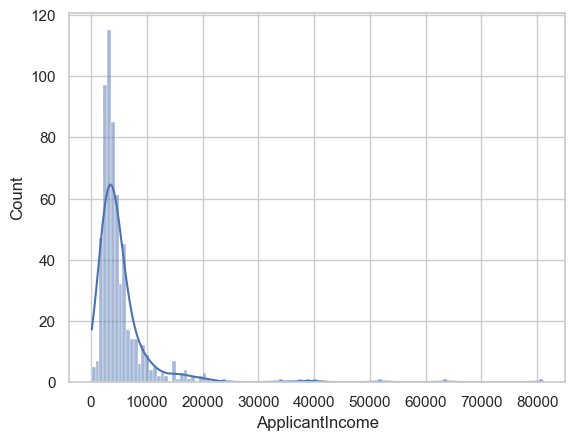

In [37]:
sns.histplot(df['ApplicantIncome'],kde=True)

Most of the applicant income between 5000 to 10000

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Count'>

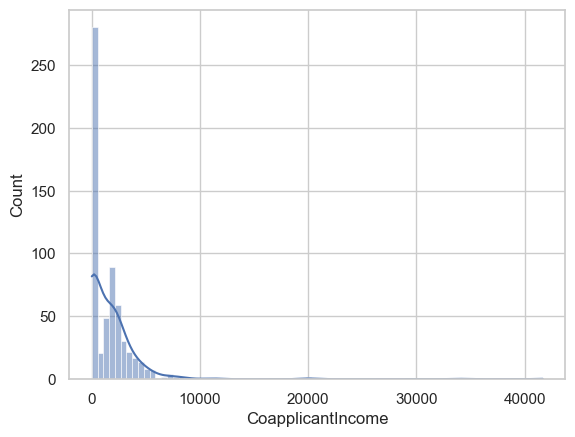

In [38]:
# Find CoapplicantIncome
sns.histplot(df['CoapplicantIncome'],kde=True)

Most of the CoapplicantIncome 

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

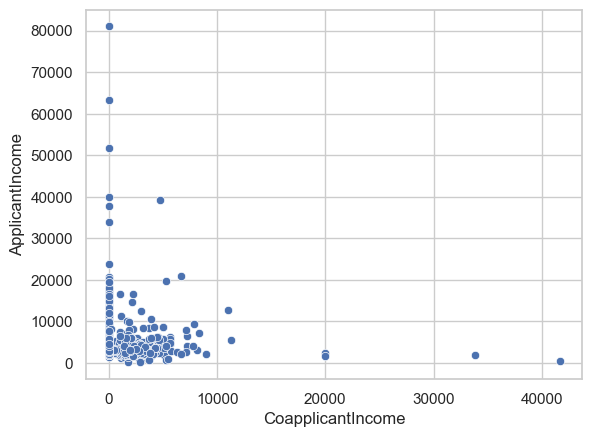

In [39]:
#Relation between Applicant income and Coapplicant income
sns.scatterplot(df['CoapplicantIncome'],df['ApplicantIncome'])

This means coapplicant income is less than ApplicantIncome

<AxesSubplot:xlabel='Loan_Status', ylabel='CoapplicantIncome'>

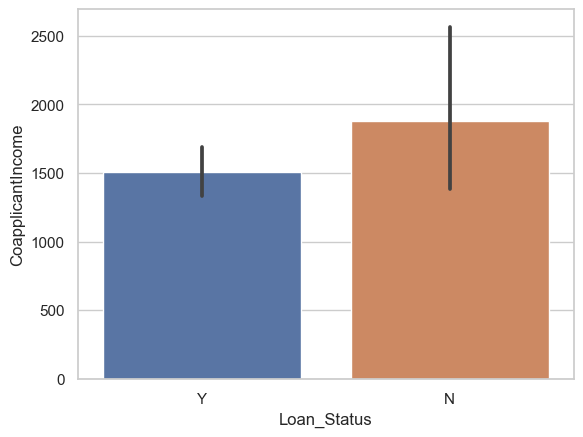

In [40]:
#Relationship between Loan_Status and CoapplicantIncome
sns.barplot(df['Loan_Status'],df['CoapplicantIncome'])

We can see that lesser CoapplicantIncome has positive loan_status rather than Greater Coapllicant income has Negative loan_status

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='ApplicantIncome'>

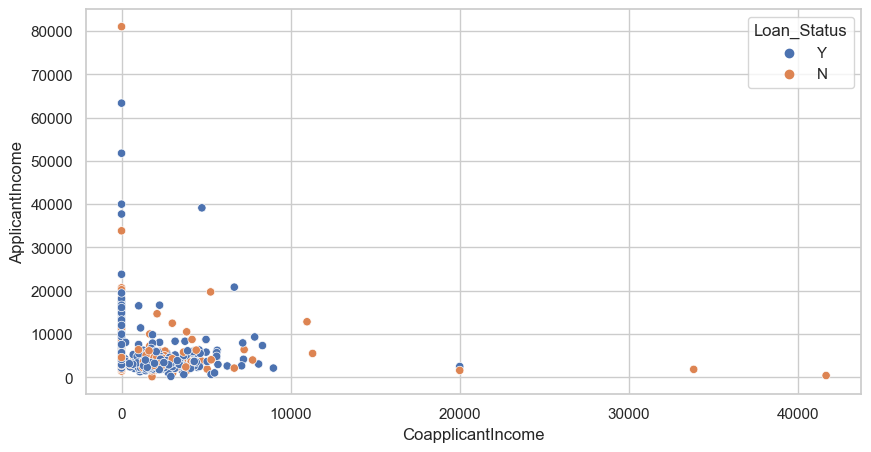

In [41]:
#Relation between Applicant income and Coapplicant income with Loan_Status
plt.figure(figsize=(10,5))
sns.scatterplot(df['CoapplicantIncome'],df['ApplicantIncome'],hue=df['Loan_Status'])

loan has approved of those Applicant whose income is lie between 0 to 10000 and also their Coapplicant

means  if Applicant income range is between 0 t0 10000 , so copapplicant income range is also same as main Applicant

then loan has been approved

<AxesSubplot:xlabel='Loan_Status', ylabel='Credit_History'>

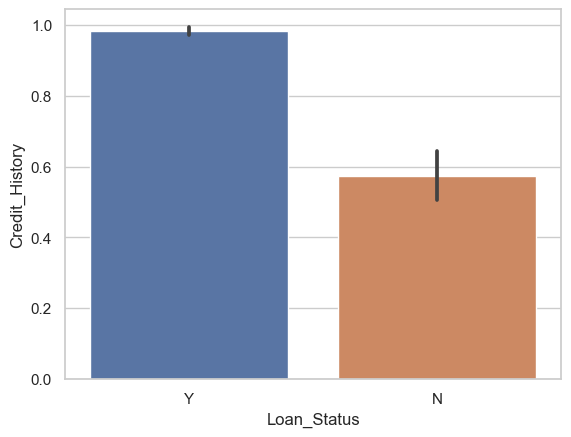

In [42]:
# Relation between Loan_Status and Credit_History
sns.barplot(df['Loan_Status'],df['Credit_History'])

 with low credit history has negative impact on loan and higher credit history has positive impact on loan

<AxesSubplot:xlabel='Property_Area', ylabel='LoanAmount'>

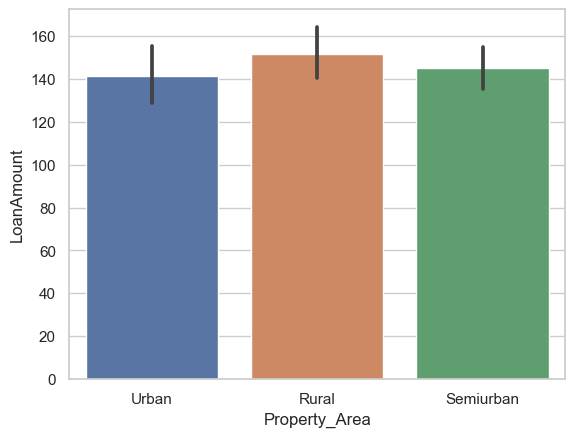

In [43]:
# Relation between Loan_Amount and property area
sns.barplot(df['Property_Area'],df['LoanAmount'])

urban and semiurban have same LoanAmount but rural Property Area has high as comparison to both of this

<AxesSubplot:xlabel='Property_Area', ylabel='Credit_History'>

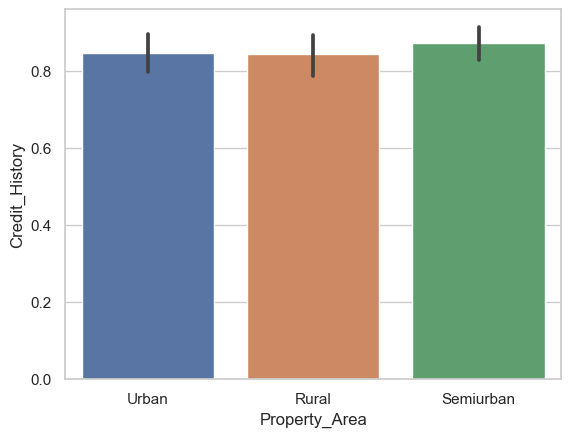

In [44]:
# Relation between Property_Area and Credit_History
sns.barplot(df['Property_Area'],df['Credit_History'])

Almost all type of property areas has equal credit history but nsemiurban has little high

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

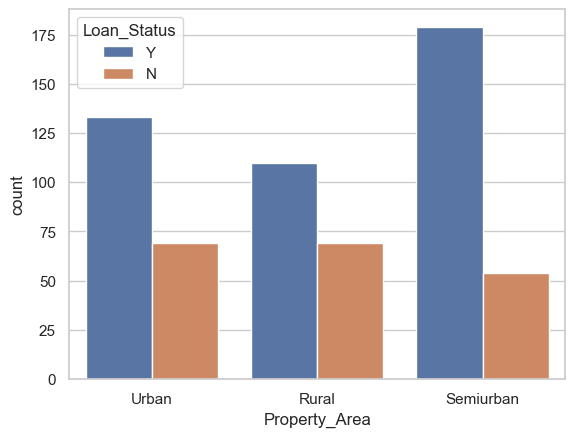

In [45]:
# Relation between property area and loanstatus
sns.countplot(df['Property_Area'],hue=df['Loan_Status'])

As above we can see credit history of semiurban is high so loan status is good as compare to both of them



<AxesSubplot:xlabel='Property_Area', ylabel='count'>

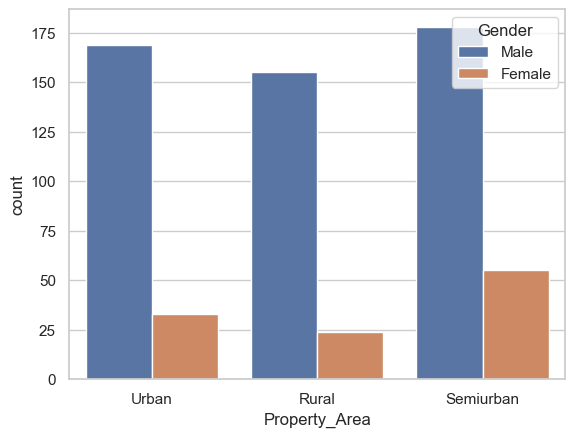

In [46]:
# Relation between property area and Gender
sns.countplot(df['Property_Area'],hue=df['Gender'])

Male Applicant is more all areas , and semiurban has most of the applicant is male

# Encoding the catagorical columns

1. Gender             
2.  Married               
3.  Education          
4.  Self_Employed 
5. Property_Area
6. Loan_Status

In [47]:
df['Gender']=df['Gender'].map({'Female':0,'Male':1})
df['Loan_Status']=df['Loan_Status'].map({'N':0,'Y':1})
df['Married']=df['Married'].map({'No':0,'Yes':1})
df['Self_Employed']=df['Self_Employed'].map({'No':0,'Yes':1})
df['Property_Area']=df['Property_Area'].map({'Urban':2,'Rural':0,'Semiurban':1})


In [48]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Education']=le.fit_transform(df['Education'])

In [49]:
col=['Gender', 'Married', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']

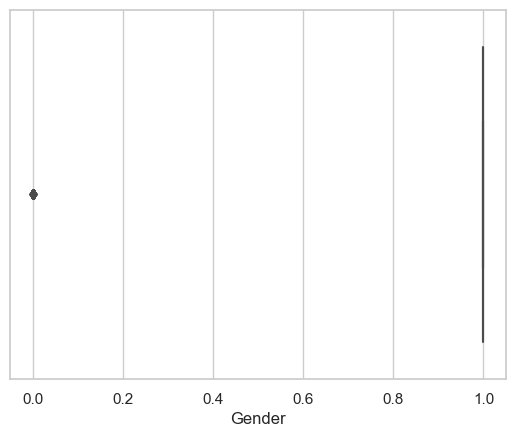

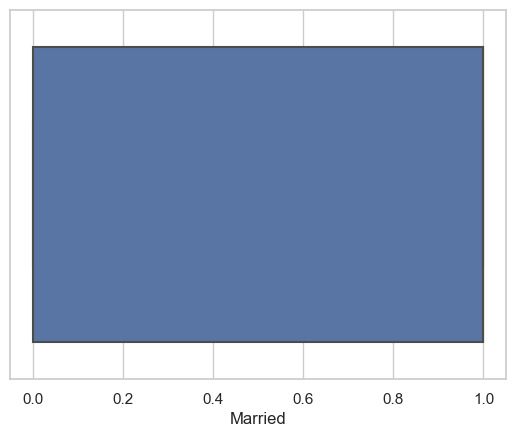

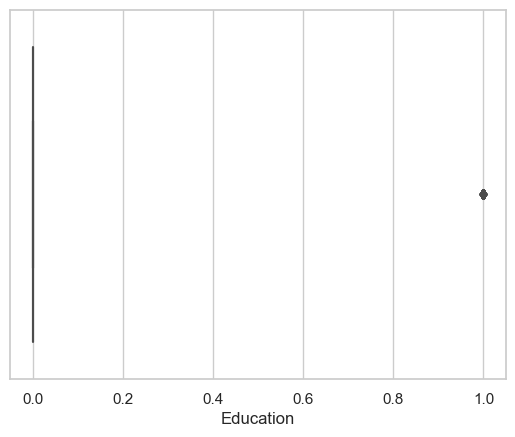

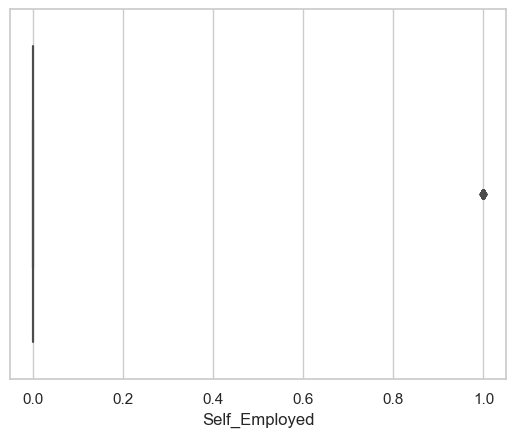

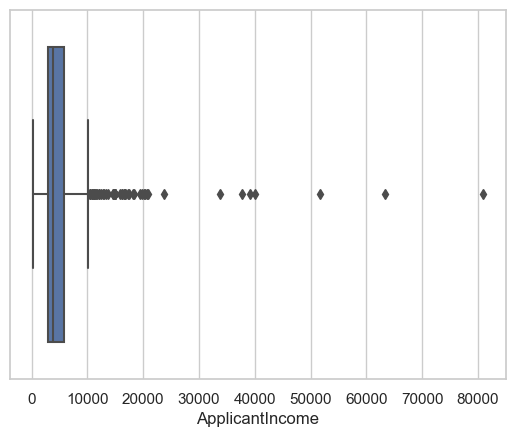

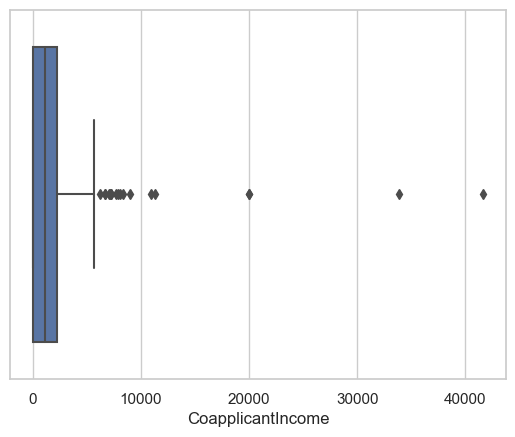

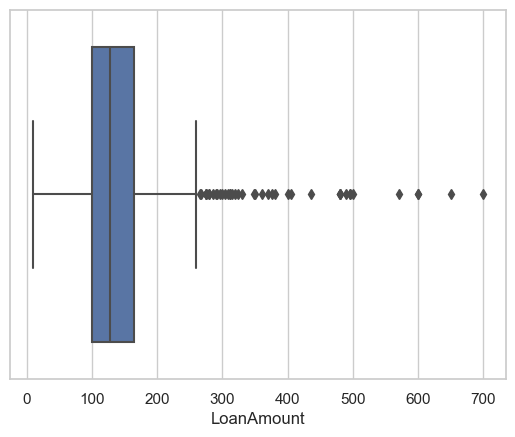

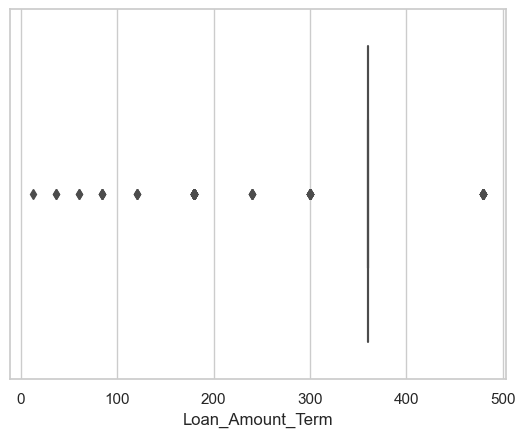

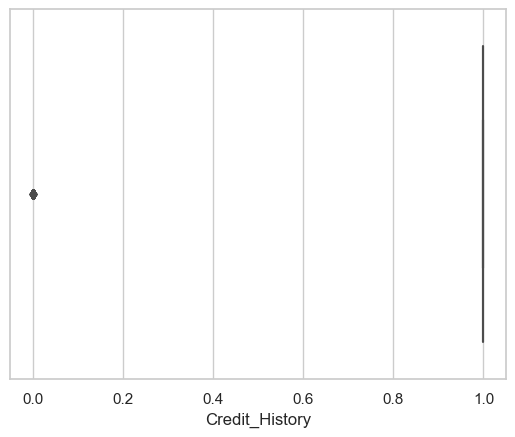

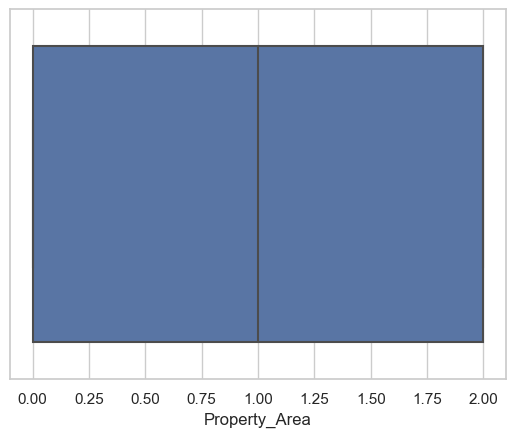

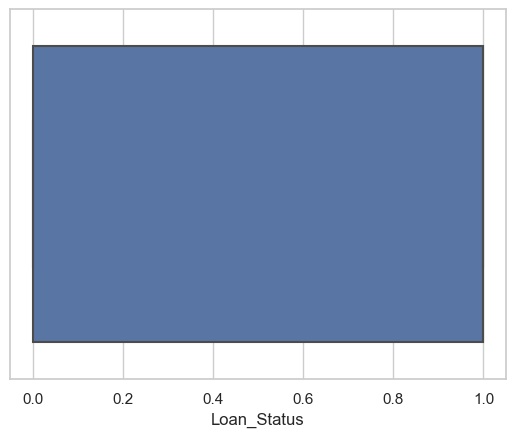

In [50]:
#Boxplot
for i in col:
    sns.boxplot(df[i])
    plt.show()

In [51]:
# drop columns dependents
df=df.drop(['Dependents'],axis=1)

In [52]:
from scipy.stats import zscore

In [53]:
z=np.abs(zscore(df))

In [54]:
z

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0.472343,1.372089,0.528362,0.392601,0.072991,0.554487,0.211241,0.273231,0.411733,1.223298,0.674519
1,0.472343,0.728816,0.528362,0.392601,0.134412,0.038732,0.211241,0.273231,0.411733,1.318513,1.482537
2,0.472343,0.728816,0.528362,2.547117,0.393747,0.554487,0.948996,0.273231,0.411733,1.223298,0.674519
3,0.472343,0.728816,1.892641,0.392601,0.462062,0.251980,0.306435,0.273231,0.411733,1.223298,0.674519
4,0.472343,1.372089,0.528362,0.392601,0.097728,0.554487,0.056551,0.273231,0.411733,1.223298,0.674519
...,...,...,...,...,...,...,...,...,...,...,...
609,2.117107,1.372089,0.528362,0.392601,0.410130,0.554487,0.889500,0.273231,0.411733,1.318513,0.674519
610,0.472343,0.728816,0.528362,0.392601,0.212557,0.554487,1.258378,2.522836,0.411733,1.318513,0.674519
611,0.472343,0.728816,0.528362,0.392601,0.437174,0.472404,1.276168,0.273231,0.411733,1.223298,0.674519
612,0.472343,0.728816,0.528362,0.392601,0.357064,0.554487,0.490816,0.273231,0.411733,1.223298,0.674519


In [55]:
threshold=3
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([5, 7, 7, 7, 4, 6, 7, 4, 6, 4, 6, 5, 6, 4, 4, 7, 7, 6, 6, 7, 4, 6,
       6, 5, 4, 5, 6, 4, 6, 7, 7, 6, 6, 6, 7, 6, 7, 5, 7, 5, 6],
      dtype=int64))


In [56]:
df1=df[(z<3).all(axis=1)]
df1

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2,1


In [57]:
# shape of data
print("shape of old data",df.shape)
print("shape of new data", df1.shape)

shape of old data (614, 11)
shape of new data (577, 11)


In [58]:
print("loss of data percentage:",((df.shape[0]-df1.shape[0])/df.shape[0])*100)

loss of data percentage: 6.026058631921824


# Split data into x and y

In [59]:
x=df1.iloc[:,:-1]
x

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,2
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,2900,0.0,71.0,360.0,1.0,0
610,1,1,0,0,4106,0.0,40.0,180.0,1.0,0
611,1,1,0,0,8072,240.0,253.0,360.0,1.0,2
612,1,1,0,0,7583,0.0,187.0,360.0,1.0,2


In [60]:
y=df1.iloc[:,-1]

In [61]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int64

# Balanced the data

In [62]:
from imblearn.over_sampling import SMOTE

In [63]:
smt=SMOTE()
x,y=smt.fit_resample(x,y)

In [64]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

In [65]:
# Fearures Scaling
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
x=st.fit_transform(x)
x

array([[ 0.53862181, -1.17308116, -0.4719473 , ...,  0.2156375 ,
         0.58284087,  1.35628196],
       [ 0.53862181,  0.85245594, -0.4719473 , ...,  0.2156375 ,
         0.58284087, -1.17502036],
       [ 0.53862181,  0.85245594, -0.4719473 , ...,  0.2156375 ,
         0.58284087,  1.35628196],
       ...,
       [-1.85659025, -1.17308116, -0.4719473 , ...,  0.2156375 ,
         0.58284087, -1.17502036],
       [-1.85659025, -1.17308116, -0.4719473 , ...,  0.2156375 ,
        -0.94643179, -1.17502036],
       [ 0.53862181, -1.17308116, -0.4719473 , ..., -0.66209594,
        -0.0897332 , -1.17502036]])

# splitting the data into train and test

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [67]:
print(x_train.shape),print(y_train.shape),print(x_test.shape),print(y_test.shape)

(636, 10)
(636,)
(160, 10)
(160,)


(None, None, None, None)

# import models

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score


In [69]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [70]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
pred_trainlg=lg.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predlg))
print("Accuracy score on training data:", accuracy_score(y_train,pred_trainlg))
print("Confusion matrix:",confusion_matrix(y_test,predlg))
print("classification report:", classification_report(y_test,predlg))

Accuracy Score: 0.7625
Accuracy score on training data: 0.7783018867924528
Confusion matrix: [[54 28]
 [10 68]]
classification report:               precision    recall  f1-score   support

           0       0.84      0.66      0.74        82
           1       0.71      0.87      0.78        78

    accuracy                           0.76       160
   macro avg       0.78      0.77      0.76       160
weighted avg       0.78      0.76      0.76       160



In [71]:
y_pred_prob=lg.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)


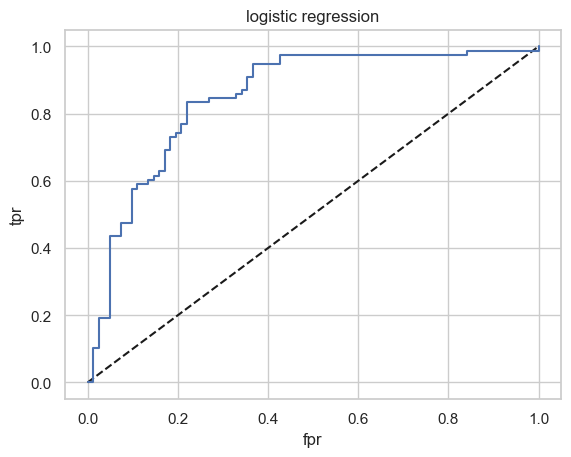

In [72]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='logistic regression')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('logistic regression') 
plt.show()         

In [73]:
auc_scorelg=roc_auc_score(y_test,lg.predict(x_test))
auc_scorelg

0.7651657285803627

In [74]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
pred_traindtc=dtc.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,preddtc))
print("Accuracy score on training data:", accuracy_score(y_train,pred_traindtc))
print("Confusion matrix:",confusion_matrix(y_test,preddtc))
print("classification report:", classification_report(y_test,preddtc))

Accuracy Score: 0.78125
Accuracy score on training data: 1.0
Confusion matrix: [[70 12]
 [23 55]]
classification report:               precision    recall  f1-score   support

           0       0.75      0.85      0.80        82
           1       0.82      0.71      0.76        78

    accuracy                           0.78       160
   macro avg       0.79      0.78      0.78       160
weighted avg       0.79      0.78      0.78       160



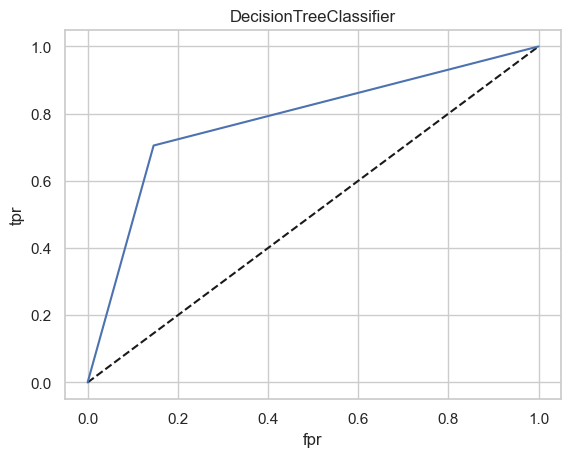

In [75]:
y_pred_prob=dtc.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='DecisionTreeClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('DecisionTreeClassifier') 
plt.show()         

In [76]:
auc_scoredtc=roc_auc_score(y_test,dtc.predict(x_test))
auc_scoredtc

0.7793933708567855

In [77]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
pred_trainknn=knn.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predknn))
print("Accuracy score on training data:", accuracy_score(y_train,pred_trainknn))
print("Confusion matrix:",confusion_matrix(y_test,predknn))
print("classification report:", classification_report(y_test,predknn))

Accuracy Score: 0.7375
Accuracy score on training data: 0.8254716981132075
Confusion matrix: [[54 28]
 [14 64]]
classification report:               precision    recall  f1-score   support

           0       0.79      0.66      0.72        82
           1       0.70      0.82      0.75        78

    accuracy                           0.74       160
   macro avg       0.74      0.74      0.74       160
weighted avg       0.75      0.74      0.74       160



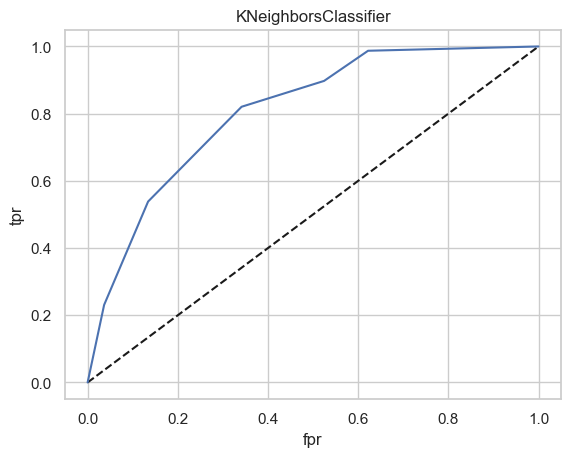

In [78]:
y_pred_prob=knn.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='KNeighborsClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('KNeighborsClassifier') 
plt.show()         

In [79]:
auc_scoreknn=roc_auc_score(y_test,knn.predict(x_test))
auc_scoreknn

0.739524702939337

In [80]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
pred_traingnb=gnb.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predgnb))
print("Accuracy score on training data:", accuracy_score(y_train,pred_traingnb))
print("Confusion matrix:",confusion_matrix(y_test,predgnb))
print("classification report:", classification_report(y_test,predgnb))

Accuracy Score: 0.78125
Accuracy score on training data: 0.7594339622641509
Confusion matrix: [[50 32]
 [ 3 75]]
classification report:               precision    recall  f1-score   support

           0       0.94      0.61      0.74        82
           1       0.70      0.96      0.81        78

    accuracy                           0.78       160
   macro avg       0.82      0.79      0.78       160
weighted avg       0.83      0.78      0.77       160



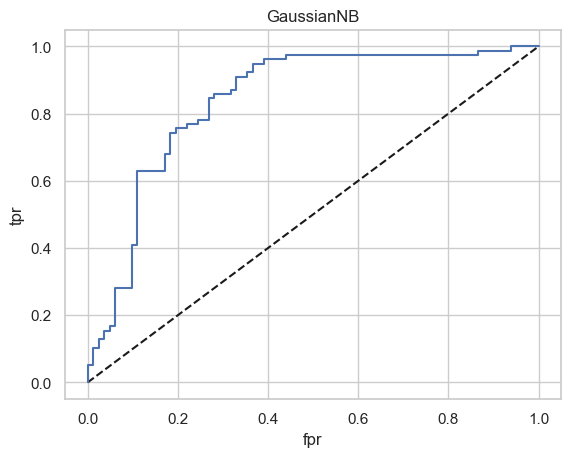

In [81]:
y_pred_prob=gnb.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GaussianNB')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('GaussianNB') 
plt.show() 

In [82]:
auc_scoregnb=roc_auc_score(y_test,gnb.predict(x_test))
auc_scoregnb

0.7856472795497187

# Parametric Tunning

In [83]:
from sklearn.model_selection import GridSearchCV

In [84]:
svm=SVC()
estimators={'kernel':['linear','poly','rbf'],'C':[1,10]}

In [85]:
gsv=GridSearchCV(estimator=svm,param_grid=estimators)
gsv.fit(x,y)
print(gsv.best_params_)
print(gsv.best_score_)
print(gsv.best_estimator_)

{'C': 10, 'kernel': 'rbf'}
0.7764544025157234
SVC(C=10)


In [86]:
svm=SVC(kernel='rbf',C=1)
svm.fit(x_train,y_train)
predsvm=svm.predict(x_test)
pred_trainsvm=svm.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predsvm))
print("Accuracy score on training data:", accuracy_score(y_train,pred_trainsvm))
print("Confusion matrix:",confusion_matrix(y_test,predsvm))
print("classification report:", classification_report(y_test,predsvm))

Accuracy Score: 0.8
Accuracy score on training data: 0.8034591194968553
Confusion matrix: [[54 28]
 [ 4 74]]
classification report:               precision    recall  f1-score   support

           0       0.93      0.66      0.77        82
           1       0.73      0.95      0.82        78

    accuracy                           0.80       160
   macro avg       0.83      0.80      0.80       160
weighted avg       0.83      0.80      0.80       160



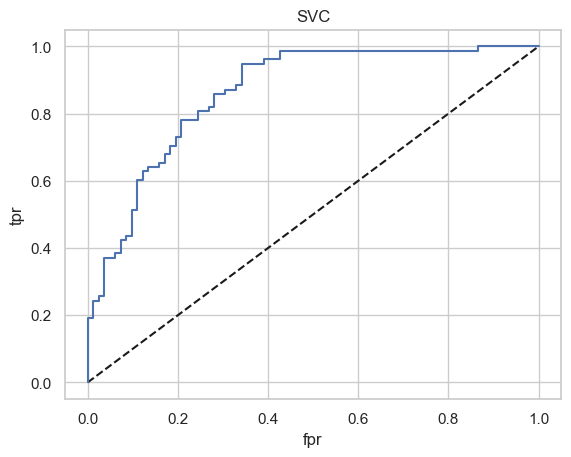

In [87]:
svm=SVC(probability=True)
svm.fit(x_train,y_train)
y_pred_prob=svm.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('SVC') 
plt.show() 

In [88]:
auc_scoresvm=roc_auc_score(y_test,svm.predict(x_test))
auc_scoresvm

0.8036272670419011

In [89]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_trainrf=rf.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predrf))
print("Accuracy score on training data:", accuracy_score(y_train,pred_trainrf))
print("Confusion matrix:",confusion_matrix(y_test,predrf))
print("classification report:", classification_report(y_test,predrf))

Accuracy Score: 0.85
Accuracy score on training data: 1.0
Confusion matrix: [[68 14]
 [10 68]]
classification report:               precision    recall  f1-score   support

           0       0.87      0.83      0.85        82
           1       0.83      0.87      0.85        78

    accuracy                           0.85       160
   macro avg       0.85      0.85      0.85       160
weighted avg       0.85      0.85      0.85       160



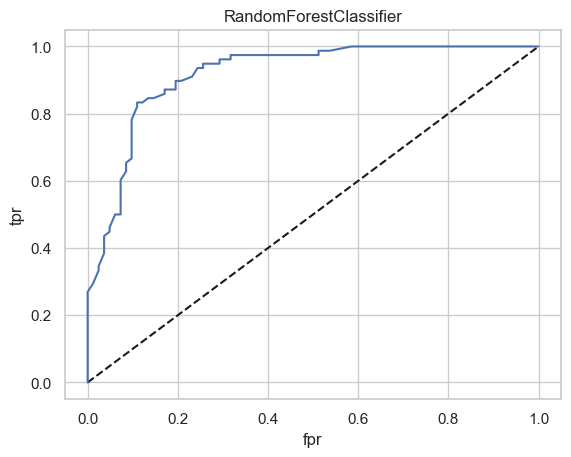

In [90]:
y_pred_prob=rf.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('RandomForestClassifier') 
plt.show() 

In [91]:
auc_scorerf=roc_auc_score(y_test,rf.predict(x_test))
auc_scorerf

0.8505315822388992

In [92]:
ada=AdaBoostClassifier()
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
pred_trainada=ada.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predada))
print("Accuracy score on training data:", accuracy_score(y_train,pred_trainada))
print("Confusion matrix:",confusion_matrix(y_test,predada))
print("classification report:", classification_report(y_test,predada))

Accuracy Score: 0.8125
Accuracy score on training data: 0.8349056603773585
Confusion matrix: [[61 21]
 [ 9 69]]
classification report:               precision    recall  f1-score   support

           0       0.87      0.74      0.80        82
           1       0.77      0.88      0.82        78

    accuracy                           0.81       160
   macro avg       0.82      0.81      0.81       160
weighted avg       0.82      0.81      0.81       160



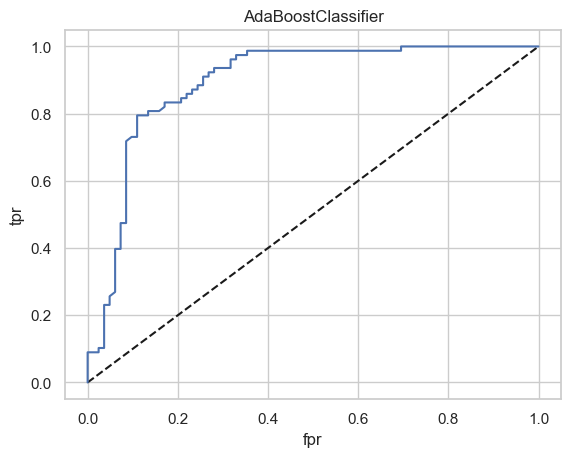

In [93]:
y_pred_prob=ada.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='AdaBoostClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('AdaBoostClassifier') 
plt.show() 

In [94]:
auc_scoreada=roc_auc_score(y_test,ada.predict(x_test))
auc_scoreada

0.8142589118198875

In [95]:
gbr=GradientBoostingClassifier()
gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
pred_traingbr=gbr.predict(x_train)
print("Accuracy Score:",accuracy_score(y_test,predgbr))
print("Accuracy score on training data:", accuracy_score(y_train,pred_traingbr))
print("Confusion matrix:",confusion_matrix(y_test,predgbr))
print("classification report:", classification_report(y_test,predgbr))

Accuracy Score: 0.81875
Accuracy score on training data: 0.9040880503144654
Confusion matrix: [[62 20]
 [ 9 69]]
classification report:               precision    recall  f1-score   support

           0       0.87      0.76      0.81        82
           1       0.78      0.88      0.83        78

    accuracy                           0.82       160
   macro avg       0.82      0.82      0.82       160
weighted avg       0.83      0.82      0.82       160



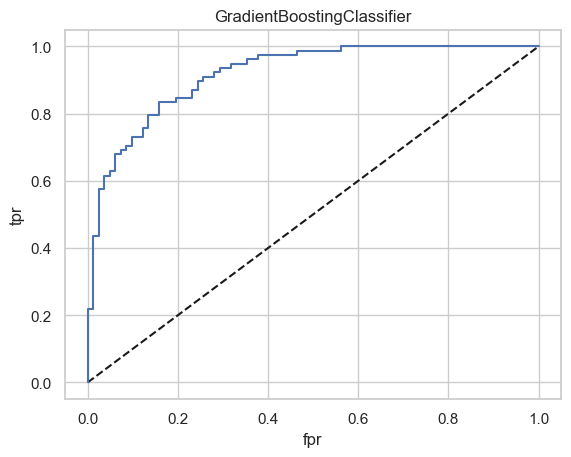

In [96]:
y_pred_prob=gbr.predict_proba(x_test)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='GradientBoostingClassifier')
plt.xlabel('fpr')
plt.ylabel('tpr') 
plt.title('GradientBoostingClassifier') 
plt.show() 

In [97]:
auc_scoregbr=roc_auc_score(y_test,gbr.predict(x_test))
auc_scoregbr

0.8203564727954971

# comparing Models

In [98]:
models={"Models":['Logistic Regression','Decision Tree','SVC','GaussianNB','KNeighbors','RandomForest','AdaBoostClassifier',
                 'GradientBoostingClassifier'],"Score":[accuracy_score(y_test,predlg),accuracy_score(y_test,preddtc),
                  accuracy_score(y_test,predsvm),accuracy_score(y_test,predgnb),accuracy_score(y_test,predknn),accuracy_score(y_test,predrf),
                                                       accuracy_score(y_test,predada),accuracy_score(y_test,predgbr)],'auc_roc_score':[auc_scorelg,
                                                        auc_scoredtc,auc_scoresvm,auc_scoregnb,auc_scoreknn,auc_scorerf,auc_scoreada,auc_scoregbr]}

In [99]:
df2=pd.DataFrame(models)
df2

,Models,Score,auc_roc_score
0,Logistic Regression,0.76250,0.765166
1,Decision Tree,0.78125,0.779393
2,SVC,0.80000,0.803627
3,GaussianNB,0.78125,0.785647
4,KNeighbors,0.73750,0.739525
5,RandomForest,0.85000,0.850532
6,AdaBoostClassifier,0.81250,0.814259
7,GradientBoostingClassifier,0.81875,0.820356


out of all models Random Forest model perform very well with score=83% and with best auc_score=83%

# crossvalidation with best performing model

In [100]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.75625    0.77358491 0.87421384 0.86792453 0.88679245]
0.831753144654088
0.05518128970937481


# save the best model

In [101]:
import pickle
filename="RandomForestClassifier.pkl"
pickle.dump(rf,open(filename,'wb'))

load_model=pickle.load(open(filename,'rb'))
load_model.predict(x_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1], dtype=int64)

In [102]:
conculusion=pd.DataFrame([load_model.predict(x_test)[:],(y_test)[:]],index=["Predicted","Original"])
conculusion

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
Predicted,0,0,1,0,0,0,1,1,1,0,...,1,1,0,1,1,0,1,0,1,1
Original,0,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,0,1,0,1,1


In [103]:
def predval(p):
    p=p.reshape(1,-1)
    print(p.shape)
    predvalue=rf.predict(p)
    print(predvalue)

In [104]:
p=np.array([1,1,0,1,5849,0.0,128.0,360.0,1.0,2])
predval(p)

(1, 10)
[0]
